In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
train_data = pd.read_csv("titanic_data/train.csv")
test_data = pd.read_csv("titanic_data/test.csv")

print(train_data.head())
print(train_data.info())
print(train_data.isnull().sum())
#these got used to see and get to know data better

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

- Preprocessing Data
  - eliminating or replacement of missing data
  - converting categorial features to numercial features
  - normalizing numercial features

In [34]:
#null values get replaced by most repetative
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Age'].fillna(train_data['Fare'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\mrham\AppData\Local\Temp\ipykernel_28640\2408936114.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\mrham\AppData\Local\Temp\ipykernel_28640\2408936114.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [35]:
#converting categorical features to numerical ones
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [36]:
#Normalizing numerical features
train_data['Age'] = (train_data['Age'] - train_data['Age'].mean()) / train_data['Age'].std()
train_data['Fare'] = (train_data['Fare'] - train_data['Fare'].mean()) / train_data['Fare'].std()

test_data['Age'] = (test_data['Age'] - test_data['Age'].mean()) / test_data['Age'].std()
test_data['Fare'] = (test_data['Fare'] - test_data['Fare'].mean()) / test_data['Fare'].std()

In [37]:
#getting the ndarray values for train
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X_train = train_data[features].values
y_train = train_data['Survived'].values
X_test = test_data[features].values

Epoch 0, Loss: 0.25000954542117276
Epoch 1000, Loss: 0.1343261883369145
Epoch 2000, Loss: 0.13259691055380518
Epoch 3000, Loss: 0.132311094374424
Epoch 4000, Loss: 0.1321464763932459
Epoch 5000, Loss: 0.13207551566689077
Epoch 6000, Loss: 0.1320892785002418
Epoch 7000, Loss: 0.13206188154420354
Epoch 8000, Loss: 0.13198749220821895
Epoch 9000, Loss: 0.1320233397553132


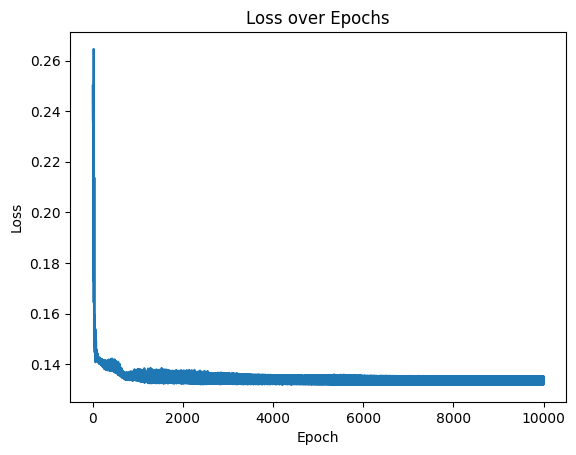

In [ ]:
#defining Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

        self.loss_history = []

    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)
  
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)  
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)  
        return self.a2
  
    def backward(self, X, y, output):
        self.error = output - y
        self.delta2 = self.error * self.sigmoid_derivative(output)
        self.dW2 = np.dot(self.a1.T, self.delta2)
        self.db2 = np.sum(self.delta2, axis=0, keepdims=True)

        self.delta1 = np.dot(self.delta2, self.W2.T) * self.relu_derivative(self.a1)
        self.dW1 = np.dot(X.T, self.delta1)
        self.db1 = np.sum(self.delta1, axis=0)
    
    def update_parameters(self, learning_rate):
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            self.update_parameters(learning_rate)

            loss = np.mean(np.square(y - output))
            self.loss_history.append(loss)

            if epoch % 1000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        plt.plot(self.loss_history)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss over Epochs')
        plt.show()

    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

# Create and train the model
input_size = X_train.shape[1]
hidden_size = 3  # At least 3 neurons in the hidden layer
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

model.train(X_train, y_train.reshape(-1, 1), epochs=10000, learning_rate=0.01)

In [39]:
#making predictions
predictions = model.predict(X_test)

In [40]:
#saving predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions.flatten().astype(int)})
output.to_csv('predictions.csv', index=False)